# 입문자를 위한, 파이썬/R 데이터 분석

## Part(2) - Day12  : 

]

## Today's mission

- [ 군집(CLUSTERING) ] : 머신러닝 데이터 분석 예제 실습
1. k-Means clustering
2. DBSCAN(Densitry-Based Spatial Clestring of Applications with Noise)

]

# [ 군집(CLUSTERING) ]

## 1. k-Means clustering

In [88]:
# -*- coding: utf-8 -*-
### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
'''
[Step 1] 데이터 준비
'''
# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [90]:
uci_path

'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

In [91]:
'''
[Step 2] 데이터 탐색
'''
# 데이터 살펴보기
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [92]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [93]:
# 데이터 통계 요약정보 확인
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [94]:
'''
[Step 3] 데이터 전처리
'''
# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
X[:5]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [95]:
# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[:5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [96]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
# 모형은 8개의 속성(변수)를 이용하여 각 관측값을 5개의 클러스터로 구분
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

In [97]:
# 모형 학습
kmeans.fit(X)   

KMeans(n_clusters=5)

In [98]:
# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)

[1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 2 2 1 1 1 2 2 1 2 2 2 2 2 2 1 2
 1 1 2 2 2 1 1 1 1 1 3 1 1 2 2 1 1 2 2 3 1 2 2 1 3 1 1 2 3 2 1 2 2 2 2 2 1
 1 2 2 1 2 2 2 1 1 2 1 3 3 2 2 2 2 2 3 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 1 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 4 2 4 2
 2 2 2 1 1 2 2 2 1 2 2 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 3 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 4 0 0 0 0 0 1 0
 3 0 1 0 0 0 0 1 1 2 1 2 2 1 1 2 1 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2
 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 1 1 2 1 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2]


In [99]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,1


In [100]:
df[df['Cluster']==3].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,10.0,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0
mean,2.0,2.500000,15964.900000,34708.500000,48536.90000,3054.600000,24875.200000,2942.800000,3.0
std,0.0,0.849837,14394.616621,19308.486409,20553.47215,2689.795994,8250.298699,1966.992504,0.0
min,2.0,1.000000,85.000000,4980.000000,26866.00000,36.000000,17740.000000,903.000000,3.0
25%,2.0,2.250000,6741.750000,24217.750000,32482.00000,996.750000,19032.000000,1360.750000,3.0
50%,2.0,3.000000,10658.500000,29109.000000,42761.00000,2924.000000,22120.500000,2443.500000,3.0
75%,2.0,3.000000,21223.000000,44240.000000,58591.25000,4365.500000,26083.500000,4576.750000,3.0
max,2.0,3.000000,44466.000000,73498.000000,92780.00000,7782.000000,40827.000000,6465.000000,3.0


<AxesSubplot:xlabel='Grocery', ylabel='Frozen'>

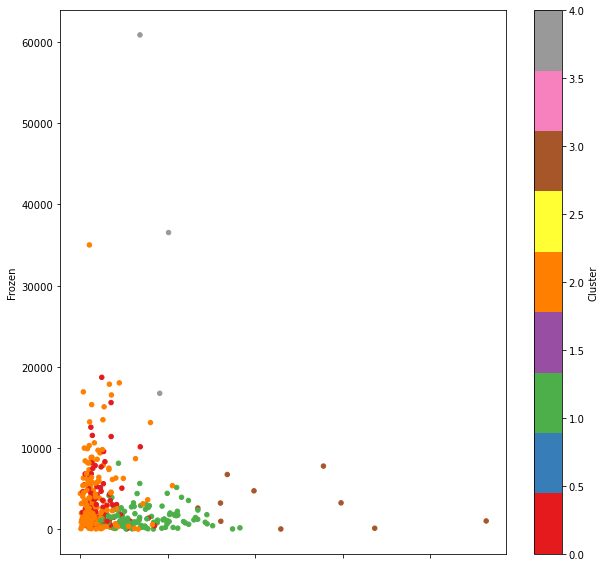

In [105]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))

<AxesSubplot:xlabel='Milk', ylabel='Delicassen'>

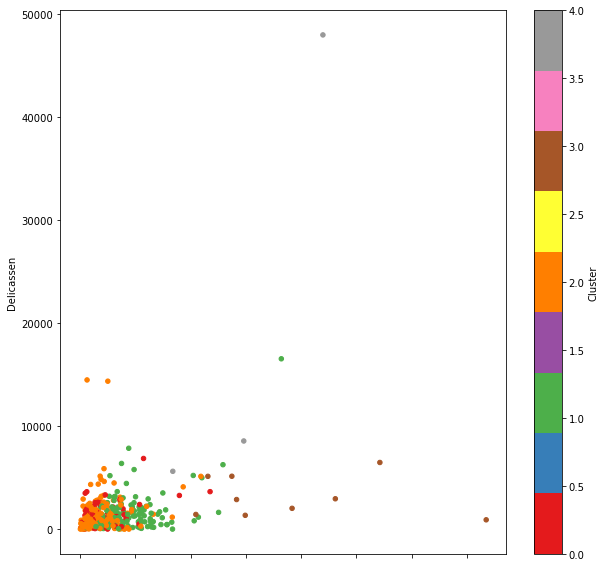

In [107]:
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))

In [108]:
# 다른 값들에 비해 지나치게큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 3) | (df['Cluster'] == 4)
ndf = df[~mask]

<AxesSubplot:xlabel='Grocery', ylabel='Frozen'>

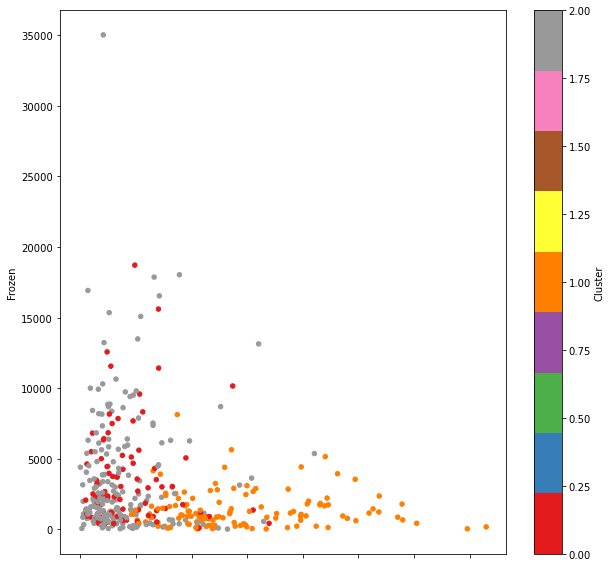

In [109]:
ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))

<AxesSubplot:xlabel='Milk', ylabel='Delicassen'>

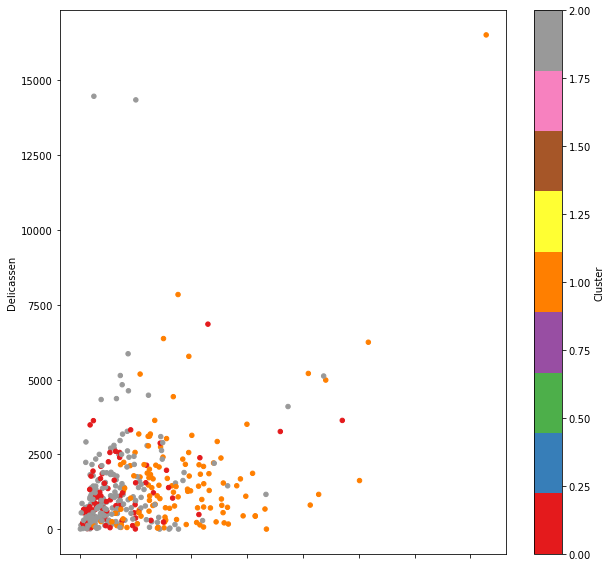

In [110]:
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))

In [111]:
# Cluster별 분석
df['Cluster'].unique()

array([1, 2, 3, 4, 0], dtype=int32)

In [112]:
df['Cluster'].value_counts()

2    209
1    127
0     91
3     10
4      3
Name: Cluster, dtype: int64

In [113]:
df[((df['Cluster'] == 3) | (df['Cluster'] == 4))].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1.769231,2.538462,26258.769231,33649.692308,41331.769231,11130.307692,19631.615385,7040.769231,3.230769
std,0.438529,0.776250,29518.041105,17732.502016,22498.265363,17953.865496,12302.832408,12516.906155,0.438529
min,1.000000,1.000000,85.000000,4980.000000,13626.000000,36.000000,239.000000,903.000000,3.000000
25%,2.000000,2.000000,8565.000000,23133.000000,26866.000000,1026.000000,17740.000000,1423.000000,3.000000
50%,2.000000,3.000000,16117.000000,29627.000000,33586.000000,3254.000000,19410.000000,2944.000000,3.000000
75%,2.000000,3.000000,35942.000000,43950.000000,55571.000000,7782.000000,24231.000000,5609.000000,3.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,4.000000


In [114]:
df[df['Cluster'].isin([1,0,2])].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,1.309133,2.543326,11566.199063,4948.269321,6935.009368,2826.594848,2371.536300,1356.939110,1.276347
std,0.462678,0.775125,11571.478152,4783.183433,6615.837141,3628.365168,3215.577386,1680.963572,0.792262
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.000000
25%,1.000000,2.000000,3092.000000,1489.000000,2126.000000,728.500000,255.500000,404.500000,1.000000
50%,1.000000,3.000000,8257.000000,3576.000000,4602.000000,1492.000000,780.000000,925.000000,1.000000
75%,2.000000,3.000000,16718.000000,6878.000000,9789.500000,3484.000000,3647.000000,1774.500000,2.000000
max,2.000000,3.000000,76237.000000,36423.000000,36486.000000,35009.000000,17120.000000,16523.000000,2.000000


In [115]:
df[df['Cluster'].isin([0])].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0
mean,1.054945,1.307692,12183.945055,3254.714286,4130.923077,3458.252747,860.263736,1149.934066,0.0
std,0.229135,0.464095,11005.915166,3646.698432,3270.262467,3526.290341,1207.212039,1077.414609,0.0
min,1.000000,1.000000,3.000000,258.000000,489.000000,91.000000,5.000000,7.000000,0.0
25%,1.000000,1.000000,4284.500000,1071.000000,1964.500000,980.000000,219.000000,450.500000,0.0
50%,1.000000,1.000000,9193.000000,1993.000000,2914.000000,2286.000000,402.000000,834.000000,0.0
75%,1.000000,2.000000,17130.000000,3816.500000,5298.500000,4660.000000,824.500000,1542.000000,0.0
max,2.000000,2.000000,56083.000000,23527.000000,16966.000000,18711.000000,5828.000000,6854.000000,0.0


In [116]:
df[df['Cluster'].isin([1])].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,127.0,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.0
mean,2.0,2.677165,8273.677165,9090.992126,14201.196850,1369.511811,6091.015748,1660.661417,1.0
std,0.0,0.640955,8304.525897,5285.470093,6837.630113,1286.215612,3491.423565,1956.207138,0.0
min,2.0,1.000000,18.000000,1124.000000,4523.000000,33.000000,523.000000,3.000000,1.0
25%,2.0,3.000000,2063.000000,6087.000000,9385.500000,486.000000,3693.000000,538.000000,1.0
50%,2.0,3.000000,5531.000000,7704.000000,12144.000000,1031.000000,5141.000000,1278.000000,1.0
75%,2.0,3.000000,12017.000000,11108.500000,19026.500000,1751.500000,7624.500000,2131.500000,1.0
max,2.0,3.000000,40721.000000,36423.000000,36486.000000,8132.000000,17120.000000,16523.000000,1.0


In [117]:
df[df['Cluster'].isin([2])].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,209.0,209.0,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.0
mean,1.0,3.0,13297.947368,3168.306220,3740.588517,3436.971292,769.392344,1262.511962,2.0
std,0.0,0.0,13047.881277,3043.600588,3280.769746,4328.419826,1066.102345,1697.848718,0.0
min,1.0,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,2.0
25%,1.0,3.0,3521.000000,1181.000000,1664.000000,779.000000,174.000000,378.000000,2.0
50%,1.0,3.0,9602.000000,2217.000000,2609.000000,1945.000000,375.000000,819.000000,2.0
75%,1.0,3.0,18291.000000,4051.000000,4757.000000,4479.000000,948.000000,1542.000000,2.0
max,1.0,3.0,76237.000000,21858.000000,21042.000000,35009.000000,6907.000000,14472.000000,2.0


In [118]:
df[df['Cluster'].isin([3])].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,10.0,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.0
mean,2.0,2.500000,15964.900000,34708.500000,48536.90000,3054.600000,24875.200000,2942.800000,3.0
std,0.0,0.849837,14394.616621,19308.486409,20553.47215,2689.795994,8250.298699,1966.992504,0.0
min,2.0,1.000000,85.000000,4980.000000,26866.00000,36.000000,17740.000000,903.000000,3.0
25%,2.0,2.250000,6741.750000,24217.750000,32482.00000,996.750000,19032.000000,1360.750000,3.0
50%,2.0,3.000000,10658.500000,29109.000000,42761.00000,2924.000000,22120.500000,2443.500000,3.0
75%,2.0,3.000000,21223.000000,44240.000000,58591.25000,4365.500000,26083.500000,4576.750000,3.0
max,2.0,3.000000,44466.000000,73498.000000,92780.00000,7782.000000,40827.000000,6465.000000,3.0


In [119]:
df[df['Cluster'].isin([4])].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,1.0,2.666667,60571.666667,30120.333333,17314.666667,38049.333333,2153.000000,20700.666667,4.0
std,0.0,0.577350,44716.718857,13589.717522,3350.644316,22100.995913,2475.033535,23638.335693,0.0
min,1.0,2.000000,32717.000000,16784.000000,13626.000000,16745.000000,239.000000,5609.000000,4.0
25%,1.0,2.500000,34782.000000,23205.500000,15887.000000,26639.500000,755.500000,7079.500000,4.0
50%,1.0,3.000000,36847.000000,29627.000000,18148.000000,36534.000000,1272.000000,8550.000000,4.0
75%,1.0,3.000000,74499.000000,36788.500000,19159.000000,48701.500000,3110.000000,28246.500000,4.0
max,1.0,3.000000,112151.000000,43950.000000,20170.000000,60869.000000,4948.000000,47943.000000,4.0


### 2. DBSCAN(Densitry-Based Spatial Clestring of Applications with Noise)

In [120]:
#!pip install --upgrade folium
#!pip install xlrd==2.0.1

In [121]:
# -*- coding: utf-8 -*-
### 기본 라이브러리 불러오기
import pandas as pd
import folium

In [122]:
'''
[Step 1] 데이터 준비/ 기본 설정
'''
pd.set_option('display.max_columns', 100)
# 서울시내 중학교 진학률 데이터셋 (출처: 교육???)
file_path = 'data/2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, header=0)
df

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,410,강남구,국립국악중학교,9,국립,주간,9,91,0.060,0.000,0.000,0.000,0.940,0.000,0.000,0.000,0.000,0,0.000,37.476381,127.051355
411,411,금천구,국립전통예술중학교,9,국립,주간,14,42,0.107,0.000,0.000,0.000,0.875,0.000,0.000,0.000,0.000,0,0.018,37.446354,126.906424
412,412,광진구,선화예술학교,9,사립,주간,33,241,0.102,0.000,0.000,0.000,0.861,0.000,0.000,0.000,0.000,0,0.036,37.549642,127.087737
413,413,중구,예원학교,9,사립,주간,31,258,0.170,0.000,0.000,0.000,0.751,0.000,0.000,0.000,0.048,0,0.031,37.566951,126.971553


In [123]:
# IPython Console 디스플레이 옵션 설정하기
pd.set_option('display.width', None)        # 출력화면의 너비
pd.set_option('display.max_rows', 100)      # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 100)    # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20)   # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정
# 열 이름 배열을 출력
df.columns

Index(['Unnamed: 0', '지역', '학교명', '코드', '유형', '주야', '남학생수',
       '여학생수', '일반고', '특성화고', '과학고', '외고_국제고', '예고_체고',
       '마이스터고', '자사고', '자공고', '기타진학', '취업', '미상', '위도',
       '경도'],
      dtype='object')

In [124]:
'''
[Step 2] 데이터 탐색
'''
# 데이터 살펴보기
df.head()

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857
2,2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744
3,3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201
4,4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900


In [125]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-null    object 
 3   코드          415 non-null    int64  
 4   유형          415 non-null    object 
 5   주야          415 non-null    object 
 6   남학생수        415 non-null    int64  
 7   여학생수        415 non-null    int64  
 8   일반고         415 non-null    float64
 9   특성화고        415 non-null    float64
 10  과학고         415 non-null    float64
 11  외고_국제고      415 non-null    float64
 12  예고_체고       415 non-null    float64
 13  마이스터고       415 non-null    float64
 14  자사고         415 non-null    float64
 15  자공고         415 non-null    float64
 16  기타진학        415 non-null    float64
 17  취업          415 non-null    int64  
 18  미상          415 non-null    float64
 19  위도          415 non-null    f

In [126]:
# 데이터 통계 요약정보 확인
df.describe()

,Unnamed: 0,코드,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
count,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.000000,415.0,415.000000,415.000000,415.000000
mean,207.000000,3.197590,126.532530,116.173494,0.623080,0.149684,0.004378,0.013687,0.017393,0.005251,0.080971,0.034296,0.069571,0.0,0.001670,37.491969,127.032792
std,119.944432,0.804272,79.217906,76.833082,0.211093,0.102977,0.006739,0.011548,0.092006,0.007557,0.079136,0.080302,0.235630,0.0,0.003697,0.348926,0.265245
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,34.979940,126.639561
25%,103.500000,3.000000,80.000000,71.500000,0.566500,0.065500,0.000000,0.006000,0.000000,0.000000,0.027000,0.000000,0.000000,0.0,0.000000,37.501934,126.921758
50%,207.000000,3.000000,129.000000,118.000000,0.681000,0.149000,0.000000,0.012000,0.005000,0.003000,0.060000,0.000000,0.007000,0.0,0.000000,37.547702,127.013579
75%,310.500000,3.000000,177.500000,161.500000,0.758000,0.224500,0.006000,0.019000,0.011000,0.007000,0.111500,0.019000,0.015000,0.0,0.003000,37.590670,127.071265
max,414.000000,9.000000,337.000000,422.000000,0.908000,0.477000,0.055000,0.110000,0.940000,0.046000,0.485000,0.531000,1.000000,0.0,0.036000,37.694777,129.106974


In [127]:
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55,126.98], #tiles='Stamen Terrain', 
                        zoom_start=12)
# 중학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=5,              # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7,      # 투명도    
                        popup=name
    ).add_to(mschool_map)
# 지도를 html 파일로 저장하기
mschool_map.save('data/seoul_mschool_location.html')

In [128]:
'''
[Step 3] 데이터 전처리
'''
# 원핫인코딩(더미 변수)
from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder()     # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

df.head(1)

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도,location,code,type,day
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.0,0.011,0.227,0.0,0.004,0,0.0,37.594942,127.038909,16,0,1,0


In [156]:
df['location'].unique()

array([16, 22,  0, 14, 17,  1, 18,  3,  7,  6, 19, 10, 24, 11,  4,  8,  9,
       12, 21, 13,  5, 15,  2, 23, 20])

In [157]:
'''
[Step 4] DBSCAN 군집 모형 - sklearn 사용
'''
# sklearn 라이브러리에서 cluster 군집 모형 가져오기 
from sklearn import cluster

# 분석에 사용할 속성을 선택 (과학고, 외고국제고, 자사고 진학률)
columns_list = [10, 11, 14]
X = df.iloc[:, columns_list]
X[:5]

,과학고,외고_국제고,자사고
0,0.018,0.007,0.227
1,0.000,0.035,0.043
2,0.009,0.012,0.090
3,0.013,0.013,0.065
4,0.007,0.010,0.282


In [158]:
# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 2.02375287, -0.57972902,  1.84751715],
       [-0.65047921,  1.84782097, -0.48039958],
       [ 0.68663683, -0.14623795,  0.11423133],
       ...,
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921, -1.18661652, -1.0244236 ],
       [-0.65047921,  0.89414062, -0.89790638]])

In [159]:
# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

In [160]:
# 모형 학습
dbm.fit(X) 

DBSCAN(eps=0.2)

In [161]:
# 예측 (군집) 
cluster_label = dbm.labels_   
print(cluster_label)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  1 -1  0  1 -1  0  0  1 -1
  2 -1  0 -1 -1 -1 -1  0 -1 -1  1  0 -1  0 -1 -1  0  3  0 -1 -1 -1  2 -1
 -1 -1 -1  0  0  0  1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1

In [163]:
pd.DataFrame(cluster_label).describe()

,0
count,415.000000
mean,-0.431325
std,0.850962
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,0.000000
max,3.000000


In [164]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
df.head()

,Unnamed: 0,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도,location,code,type,day,Cluster,Cluster2,Cluster3
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.000,37.594942,127.038909,16,0,1,0,-1,-1,-1
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.000,37.577473,127.003857,22,0,1,0,-1,-1,0
2,2,강남구,개원중학교,3,공립,주간,170,152,0.817,0.047,0.009,0.012,0.003,0.006,0.090,0.003,0.009,0,0.003,37.491637,127.071744,0,0,0,0,-1,-1,1
3,3,강남구,개포중학교,3,공립,주간,83,72,0.755,0.097,0.013,0.013,0.019,0.019,0.065,0.000,0.019,0,0.000,37.480439,127.062201,0,0,0,0,-1,-1,-1
4,4,서초구,경원중학교,3,공립,주간,199,212,0.669,0.017,0.007,0.010,0.005,0.000,0.282,0.000,0.010,0,0.000,37.510750,127.008900,14,0,0,0,-1,-1,1


In [166]:
# 클러스터 값으로 그룹화하고, 그룹별로 내용 출력 (첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped_cols].head())
    print('\n')

* key : -1
* number : 255
   Unnamed: 0    지역  코드  과학고  외고_국제고  자사고
0           0  성북구     3   0.018        0.007   0.227
1           1  종로구     3   0.000        0.035   0.043
2           2  강남구     3   0.009        0.012   0.090
3           3  강남구     3   0.013        0.013   0.065
4           4  서초구     3   0.007        0.010   0.282


* key : 0
* number : 102
    Unnamed: 0    지역  코드  과학고  외고_국제고  자사고
13          13  서초구     3     0.0        0.022   0.038
22          22  강남구     3     0.0        0.019   0.044
28          28  서초구     3     0.0        0.015   0.050
34          34  강남구     3     0.0        0.016   0.065
43          43  송파구     3     0.0        0.021   0.054


* key : 1
* number : 45
     Unnamed: 0      지역  코드  과학고  외고_국제고  자사고
46           46    강동구     3     0.0          0.0   0.044
103         103    양천구     3     0.0          0.0   0.006
118         118    구로구     3     0.0          0.0   0.012
126         126  영등포구     3     0.0          0.0   0.050
175         17

In [167]:
# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'black'}

cluster_map = folium.Map(location=[37.55,126.98], #tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster_map)

In [168]:
# 지도를 html 파일로 저장하기
cluster_map.save('data/seoul_mschool_cluster.html')

In [171]:
# X2 데이터셋에 대하여 위의 과정을 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [10, 11, 14, 22]
X2 = df.iloc[:, columns_list2]
X2[:5]

,과학고,외고_국제고,자사고,code
0,0.018,0.007,0.227,0
1,0.000,0.035,0.043,0
2,0.009,0.012,0.090,0
3,0.013,0.013,0.065,0
4,0.007,0.010,0.282,0


In [172]:
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)  
df['Cluster2'] = dbm2.labels_   

In [179]:
grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped2_cols].head())
    print('\n')

* key : -1
* number : 260
   Unnamed: 0    지역  코드  과학고  외고_국제고  자사고  code
0           0  성북구     3   0.018        0.007   0.227     0
1           1  종로구     3   0.000        0.035   0.043     0
2           2  강남구     3   0.009        0.012   0.090     0
3           3  강남구     3   0.013        0.013   0.065     0
4           4  서초구     3   0.007        0.010   0.282     0


* key : 0
* number : 101
    Unnamed: 0    지역  코드  과학고  외고_국제고  자사고  code
13          13  서초구     3     0.0        0.022   0.038     0
22          22  강남구     3     0.0        0.019   0.044     0
28          28  서초구     3     0.0        0.015   0.050     0
34          34  강남구     3     0.0        0.016   0.065     0
43          43  송파구     3     0.0        0.021   0.054     0


* key : 1
* number : 15
     Unnamed: 0      지역  코드  과학고  외고_국제고  자사고  code
46           46    강동구     3     0.0          0.0   0.044     0
103         103    양천구     3     0.0          0.0   0.006     0
118         118    구로구     3     0.0   

In [180]:
cluster2_map = folium.Map(location=[37.55,126.98], #tiles='Stamen Terrain', 
                        zoom_start=12)

In [181]:
for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster2_map)

In [182]:
# 지도를 html 파일로 저장하기
cluster2_map.save('data/seoul_mschool_cluster2.html')

In [183]:
# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3 = [10, 11]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

   과학고  외고_국제고
0   0.018        0.007
1   0.000        0.035
2   0.009        0.012
3   0.013        0.013
4   0.007        0.010




In [184]:
X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)  
df['Cluster3'] = dbm3.labels_ 

In [185]:
grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped3_cols].head())
    print('\n')

* key : -1
* number : 61
   Unnamed: 0    지역  코드  과학고  외고_국제고
0           0  성북구     3   0.018        0.007
3           3  강남구     3   0.013        0.013
6           6  강남구     3   0.015        0.036
7           7  강남구     3   0.032        0.005
8           8  강남구     3   0.013        0.029


* key : 0
* number : 160
    Unnamed: 0    지역  코드  과학고  외고_국제고
1            1  종로구     3     0.0        0.035
13          13  서초구     3     0.0        0.022
22          22  강남구     3     0.0        0.019
28          28  서초구     3     0.0        0.015
29          29  강남구     3     0.0        0.007


* key : 1
* number : 111
    Unnamed: 0    지역  코드  과학고  외고_국제고
2            2  강남구     3   0.009        0.012
4            4  서초구     3   0.007        0.010
5            5  강남구     3   0.007        0.007
11          11  강남구     3   0.007        0.024
14          14  서초구     3   0.010        0.013


* key : 2
* number : 50
     Unnamed: 0      지역  코드  과학고  외고_국제고
46           46    강동구     3     0.0     

In [186]:
cluster3_map = folium.Map(location=[37.55,126.98], #tiles='Stamen Terrain', 
                        zoom_start=12)

In [187]:
for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster3_map)

In [188]:
# 지도를 html 파일로 저장하기
cluster3_map.save('data/seoul_mschool_cluster3.html')